In [11]:
# file: dirichlet_mixture_model.py
# Author: Anne Sabourin
# Description: unsupervised.mvsets: Anomaly scoring on extremes with  Mass-Volume sets
# Date: May 2025

# Tutorial notebook for generation of multivariate heavy-tailed (i.e. Regularly varying) datasets with limit angular distribution following a Dirichlet Mixture

Useful references about the Dirichlet Mixture model

    * Boldi, M. O., & Davison, A. C. (2007). A mixture model for multivariate extremes. Journal of the Royal Statistical Society Series B: Statistical Methodology, 69(2), 217-229.

    * Sabourin, A., & Naveau, P. (2014). Bayesian Dirichlet mixture model for multivariate extremes: a re-parametrization. Computational Statistics & Data Analysis, 71, 542-567.

    * Chiapino, M., Clémençon, S., Feuillard, V., & Sabourin, A. (2020). A multivariate extreme value theory approach to anomaly clustering and visualization. Computational Statistics, 35(2), 607-628.

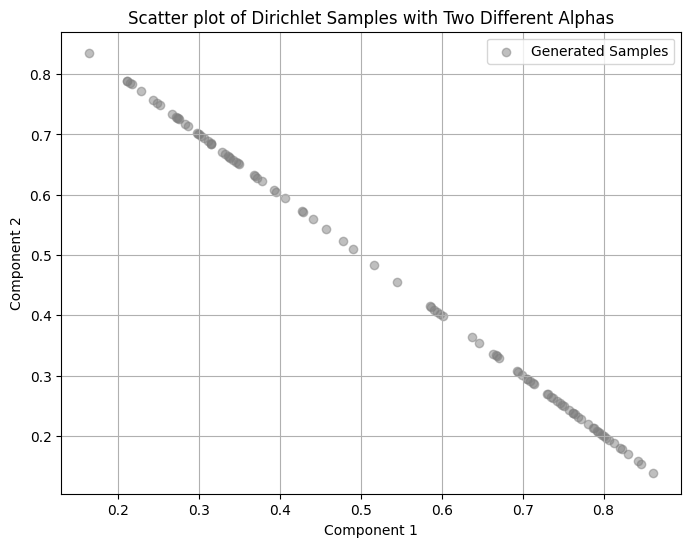

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import MLExtreme as mlx

# test for function rdirichlet

# Parameters for the test
n = 100  # Number of samples
p = 2    # Number of components in the Dirichlet distribution

# Define two constant alpha vectors for the two groups
alpha1 = np.array([10, 20])  # First constant alpha for the first n/2 rows
alpha2 = np.array([30, 10])  # Second constant alpha for the last n/2 rows

# Create the alpha matrix by repeating the two alpha vectors
alpha = np.vstack([np.tile(alpha1, (n//2, 1)), np.tile(alpha2, (n//2, 1))])

# Generate the Dirichlet samples
samples = mlx.gen_dirichlet(alpha, size=n)


# Plot the generated data 
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], color='grey', alpha=0.5,
            label='Generated Samples')

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Scatter plot of Dirichlet Samples with Two Different Alphas')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Test for function gen_dirimix (generating angular datasets from a dirichlet mixture)
p = 3  # Number of components in each Dirichlet distribution
k = 4  # Number of mixture components
n = 10  # Number of samples

Mu = np.random.rand(k, p) # k* p  matrix of means
lnu = np.random.rand(k)  # k vector of log-scales
wei = np.random.rand(k)  # k vector of weights

# Generate the mixture samples
samples = mlx.gen_dirimix(Mu, wei, lnu, size=n)

# Print the generated samples
print(samples)

[[2.10195558e-05 9.99774047e-01 2.04933674e-04]
 [8.77299467e-01 1.22260136e-01 4.40396690e-04]
 [4.84710940e-01 4.58450853e-01 5.68382072e-02]
 [8.40770030e-01 1.55912933e-01 3.31703635e-03]
 [1.47223930e-03 2.87684022e-01 7.10843738e-01]
 [2.94563718e-04 9.99618814e-01 8.66223200e-05]
 [1.08702218e-02 7.07321136e-01 2.81808642e-01]
 [1.27033133e-01 2.35680108e-01 6.37286759e-01]
 [4.10693866e-06 3.43902431e-01 6.56093462e-01]
 [1.81441177e-10 7.80853217e-02 9.21914678e-01]]


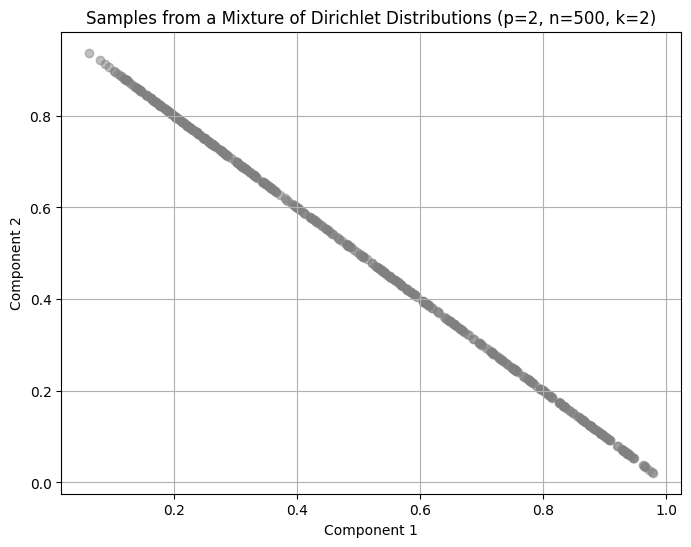

In [14]:
# Plot the output

# Parameters for the example
n = 500  # Number of samples
p = 2    # Number of components in the Dirichlet distribution
k = 3    # Number of mixture components

# Mixture means (Mu), log scale (lnu), and weights (wei)
Mu = np.array([[0.2, 0.8], [0.8, 0.2], [0.5,0.5]])  # k* p matrix of means
lnu = np.log(20) * np.ones(k)  # log(10) for both components
wei = np.array([0.5, 0.2, 0.3])  # weights for the mixture components

# normalize the parameters so that the generated random vector h as
# unit pareto margins when the Dirichlet angle is multiplied by a
# pareto(1) radius

Mu, wei = mlx.normalize_param_dirimix(Mu, wei)

# Generate samples using the mixture of Dirichlet distributions
samples = mlx.gen_dirimix(Mu, wei, lnu, size=n)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], color='grey', alpha=0.5)
plt.title(
    "Samples from a Mixture of Dirichlet Distributions (p=2, n=500, k=2)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

Density plots  with angular density plotting functions

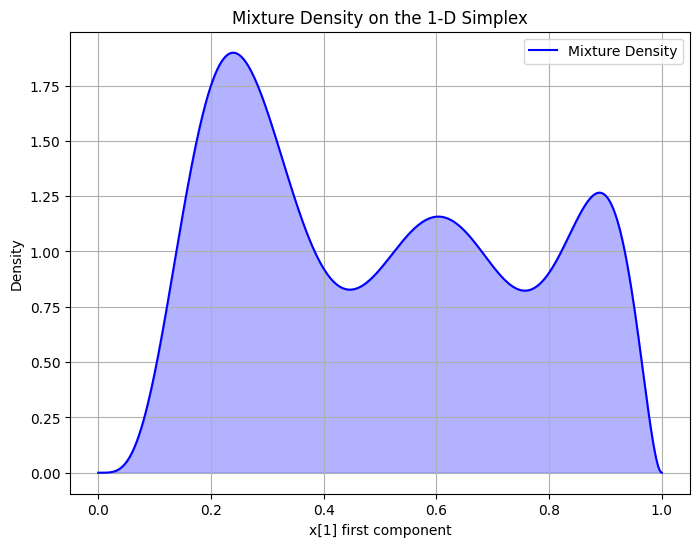

In [15]:
#  (2D example)

# Plot the mixture density

mlx.plot_pdf_dirimix_2D(Mu,  wei, lnu)

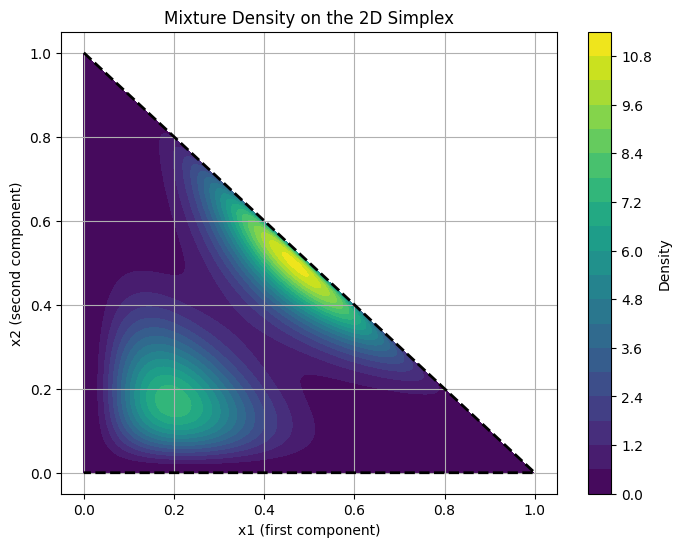

In [16]:
# (3D example)
Mu = np.array([[0.2, 0.7, 0.1], [0.1, 0.3, 0.6]])  # Means for 3 components
lnu = np.log(15) * np.ones(2)  # log(10) for each component
wei = np.array([0.5, 0.5])  # Mixture weights
Mu, wei = mlx.normalize_param_dirimix(Mu, wei)

mlx.plot_pdf_dirimix_3D(Mu, wei, lnu)

Generation of multivariate heavy-tailed data
X = R * Theta
R is Pareto distributed ; Theta ~ Dirichlet mixture depending on R,
The ditribution of Theta|R = r converges to a limit distribution for large r.
This type of data is called RV-dirimix here and throughout.

[0.5 0.5]


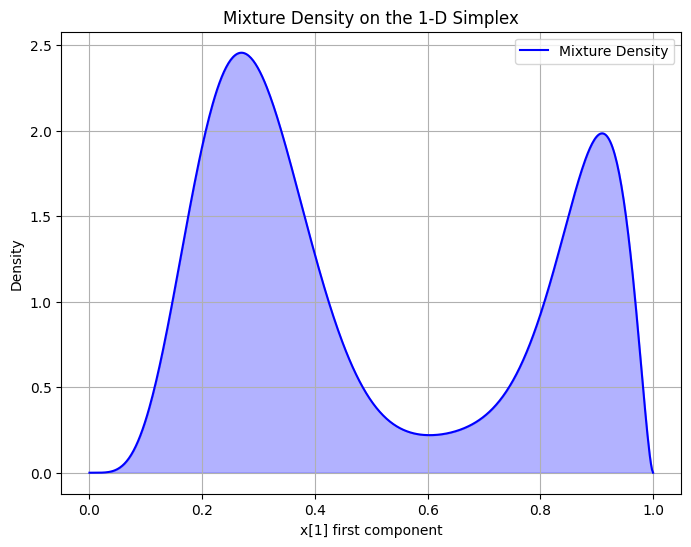

In [17]:
# Example RV-dirimix  data generation p = 2
n = 5000  # Number of samples
p = 2  # Dimensionality of the simplex (2D in this case)
k = 3  # Number of components in the Dirichlet mixture
alpha = 2.5  # Shape parameter of the Pareto distribution

# Mixture means (Mu), log scale (lnu), and weights (wei)
Mu = np.array([[0.2, 0.8], [0.8, 0.2], [0.5, 0.5]])  # k* p matrix of means
lnu = np.log(20) * np.ones(k)  # log(10) for both components
wei = np.array([0.5, 0.2, 0.03])  # weights for the mixture components
Mu, wei = mlx.normalize_param_dirimix(Mu, wei)
# inspect the angular density
Mu_wei = wei  @ Mu
# Display the result
print(Mu_wei)
mlx.plot_pdf_dirimix_2D(Mu, wei, lnu)

In [18]:
# Generate the dataset using the gen_rv_dirimix function.
# As an adversarial (bulk) angular parameter, use the  center of the simplex
X = mlx.gen_rv_dirimix(alpha, Mu, wei, lnu, index_weight_noise=3,
                       Mu_bulk=(np.ones(p)/p).reshape(1, p),
                       wei_bulk=np.ones(1),
                       lnu_bulk=np.ones(1) * np.log(2),
                       size=n)

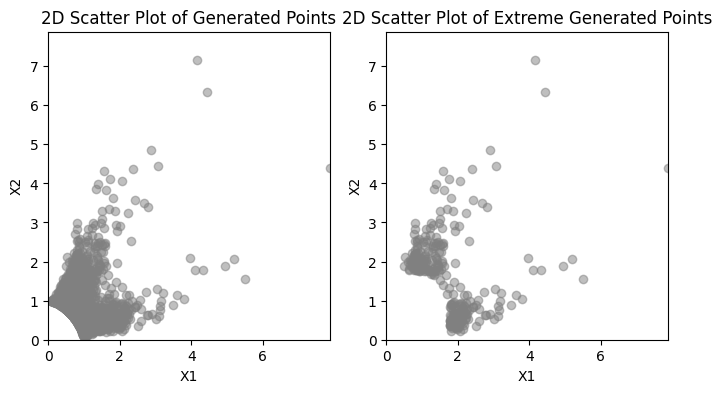

In [19]:
# Plotting the dataset (2D plot), rescale for easier visualization
X_disp = X**(alpha/4)
idex = np.sum(X**alpha, axis=1) > 10
fig, axs = plt.subplots(1, 2, figsize=(8, 4)) 
axs[0].scatter(X_disp[:, 0], X_disp[:, 1], color='grey', alpha=0.5)
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')
max_range = max(np.max(X_disp[:, 0]), np.max(X_disp[:, 1]))
axs[0].set_xlim(0, max_range)
axs[0].set_ylim(0, max_range)
axs[0].set_title('2D Scatter Plot of Generated Points')
axs[1].scatter(X_disp[idex, 0], X_disp[idex, 1], color='grey', alpha=0.5)
axs[1].set_xlabel('X1')
axs[1].set_ylabel('X2')
max_range = max(np.max(X_disp[idex, 0]), np.max(X_disp[idex, 1]))
axs[1].set_xlim(0, max_range)
axs[1].set_ylim(0, max_range)
axs[1].set_title('2D Scatter Plot of Extreme Generated Points')
plt.show()

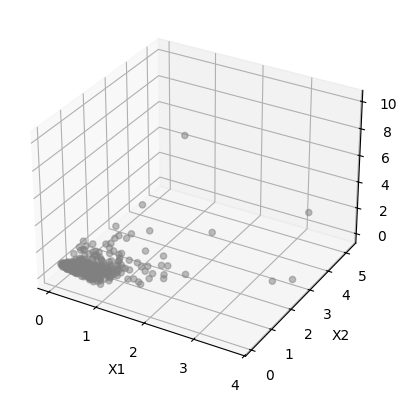

In [20]:
# Example usage p = 3
n = 500  # Number of samples
p = 3  # Dimensionality of the simplex
k = 2  # Number of components in the Dirichlet mixture
alpha = 2.5  # Shape parameter of the Pareto distribution
# Parameters for the Dirichlet mixture
Mu = np.array([[0.2, 0.7, 0.1], [0.1, 0.3, 0.6]])  # Means for 3 components
lnu = np.log(15) * np.ones(2)  # log(10) for each component
wei = np.array([0.5, 0.5])  # Mixture weights
Mu, wei = mlx.normalize_param_dirimix(Mu, wei)

# Generate the dataset and plot the output
X = mlx.gen_rv_dirimix(alpha, Mu, wei, lnu, size=n)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], color='gray', alpha=0.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()